In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import zipfile

In [ ]:
tf.random.set_seed(42)
print('Tensorflow version',tf.__version__)

Tensorflow version 2.19.0


In [ ]:
# Download DataSet from Kaggle.com
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 93% 152M/163M [00:00<00:00, 1.59GB/s]
100% 163M/163M [00:00<00:00, 1.55GB/s]


In [ ]:
with zipfile.ZipFile('face-mask-dataset.zip','r') as zip_ref:
  zip_ref.extractall(".")

In [ ]:
base_dir="data"
print("DataSet Folders:",os.listdir(base_dir))

DataSet Folders: ['without_mask', 'with_mask']


In [ ]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2
                           )
train_data=datagen.flow_from_directory(base_dir,target_size=(224,224),batch_size=32, class_mode='binary',subset='training',seed=42)

Found 6043 images belonging to 2 classes.


In [ ]:
test_data=datagen.flow_from_directory(base_dir,target_size=(224,224),batch_size=32, class_mode='binary',subset='validation',seed=42)

Found 1510 images belonging to 2 classes.


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.3), #used for preventing overfitting
    tf.keras.layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,560,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,595,281 (9.90 MB)

 Trainable params: 2,595,281 (9.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(train_data,epochs=5,validation_data=test_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 31/189 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.5470 - loss: 0.8011

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 38s 139ms/step - accuracy: 0.7509 - loss: 0.5029 - val_accuracy: 0.9258 - val_loss: 0.2446
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.8806 - loss: 0.2820 - val_accuracy: 0.9040 - val_loss: 0.2551
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - accuracy: 0.9064 - loss: 0.2287 - val_accuracy: 0.9351 - val_loss: 0.1996
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.9247 - loss: 0.1975 - val_accuracy: 0.9298 - val_loss: 0.1831
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - accuracy: 0.9387 - loss: 0.1581 - val_accuracy: 0.9265 - val_loss: 0.2048


In [ ]:
#Evaluate
loss,accuracy=model.evaluate(test_data)
#
print(f"Loss:{loss}")
print(f"Accuracy: {accuracy*100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9297 - loss: 0.1960
Loss:0.20477357506752014
Accuracy: 92.65%


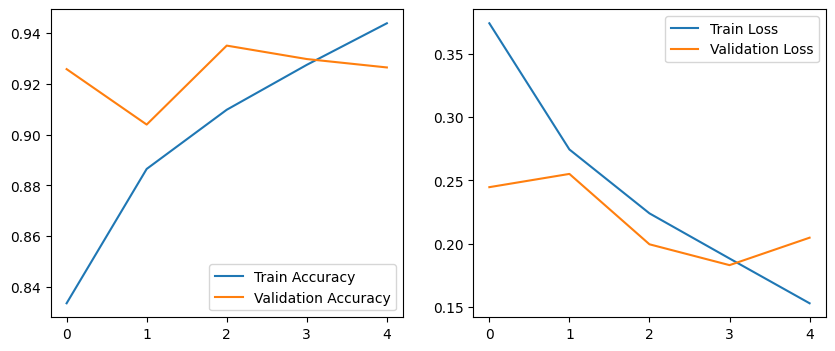

In [ ]:
#plot Accuracy and Loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


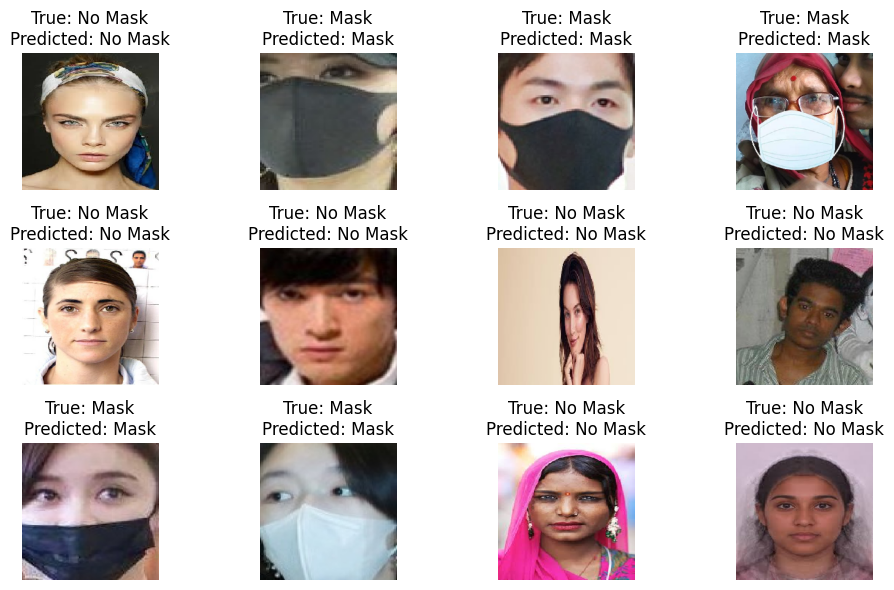

In [ ]:
images,labels=next(test_data)
predictions=model.predict(images)
plt.figure(figsize=(10,6))
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.imshow(images[i])
  true_label="Mask" if labels[i]==0 else "No Mask"
  predicted_label="Mask" if predictions[i]<0.5 else "No Mask"
  plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
  plt.axis('off')
plt.tight_layout()
plt.show()
#

Saving remyy.webp to remyy.webp
File Uploaded:  remyy.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: No Mask
Confidence: 63.073055 %


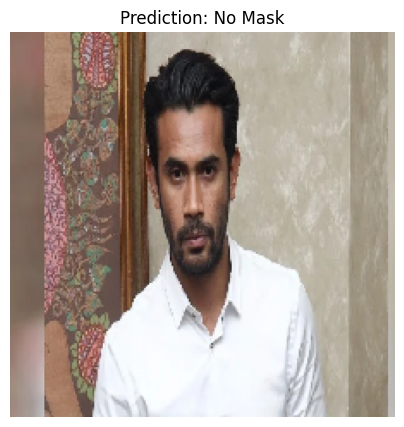

In [ ]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  img_path=fn
  print("File Uploaded: ",img_path)
  img=image.load_img(img_path,target_size=(224,224))
  img_array=image.img_to_array(img)
  img_array=np.expand_dims(img_array,axis=0)/255.0

  pred=model.predict(img_array)[0][0]
  label="No Mask" if pred<0.5 else "Mask"
  print("Prediction:",label)
  print("Confidence:",100*(1-pred) if pred<0.5 else 100*pred,"%")

  plt.figure(figsize=(5,5))
  plt.imshow(img)
  plt.title(f"Prediction: {label}")
  plt.axis("off")
  plt.show()